## Price Optimization for Cafe

Pricing is a critical aspect of business, requiring careful consideration. Various strategies are used for different types of products. Some products are highly price-sensitive, where even a small price change significantly impacts sales, while others, such as luxury items or essential goods like certain medicines, are less affected by price fluctuations. This discussion focuses on the former category.

Price elasticity of demand (EpD), often referred to as elasticity, measures how consumers' desire for a product changes as its price fluctuates. Generally, as prices rise, demand decreases. However, certain products experience a sharp decline in demand with even a slight price increase, while others see little change even with substantial price hikes. Economists use "elasticity" to describe this responsiveness to price changes. More precisely, it indicates the percentage change in quantity demanded resulting from a one percent increase in price, assuming all other factors remain constant.

In mathematical terms, price elasticity of demand is defined as the percentage change in quantity demanded (q) divided by the percentage change in price (p). This is expressed using the formula for price elasticity (ε):

> $$ e = \frac{\Delta Q}{\Delta P}$$

In this project, we shall look at the sales of the items of a cafe. This cafe sells burgers, coke, lemonade and coffee. It is our task to figure out the optimal prices to set for these items. If the price is set too high, the sales will drop & the price is set to low, then the margins will decrease. What is the sweet spot that will give us the maximum profit?

### Import Dependencies

In [1]:
#Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

import statsmodels.api as sm
from statsmodels.formula.api import ols

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Get multiple outputs for every line of code in every cell and not only the last code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
# Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load the Data

In [5]:
sales_data = pd.read_csv('Data/Cafe+-+Sell+Meta+Data.csv')
transaction_data = pd.read_csv("Data/Cafe+-+Transaction+-+Store.csv")
date_info = pd.read_csv("Data/Cafe+-+DateInfo.csv")

##### About sales_data

In [6]:
sales_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


**SELL_ID**: a categorical variable, identifier of the combination of items that is contained in the product.

**SELL_CATEGORY**: “0” identifies single products; the category “2” identifies the combo ones.

**ITEM_ID**: a categorical variable, identifier of the item that is contained in the product.

**ITEM_NAME**: a categorical variable, identifying the name of the item

In [10]:
# Check data types

sales_data.dtypes

SELL_ID           int64
SELL_CATEGORY     int64
ITEM_ID           int64
ITEM_NAME        object
dtype: object

In [9]:
# Get summary or staatistical data for columns with data type integers
sales_data.describe()

# Get summary or statistical data for columns with data type string or object
sales_data.describe(include = ['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [11]:
# Identify and extract rows in the 'sales_data' dataframe where 
# there are missing values in at least one column. 
# This can be useful for data cleaning and exploration 
# to understand and handle missing data in the dataset.

sales_data[sales_data.isnull().any(axis=1)]

# .any(axis=1) --> filters the 'sold' dataframe to select rows where at least one value is 
# missing in any of the columns.

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


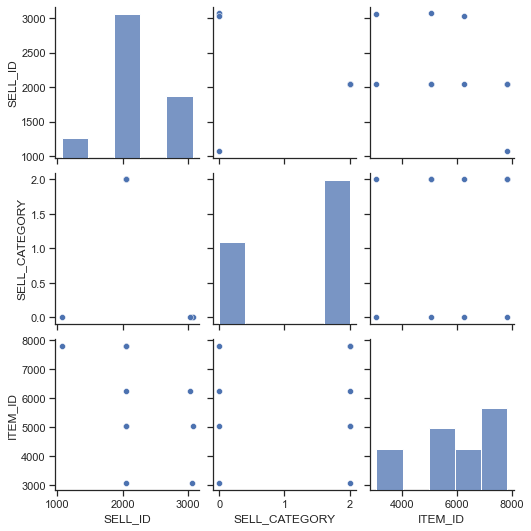

In [12]:
# distribution of variables
# Scatterplot of numerical variables

sns.pairplot(sales_data)

##### About transaction_data

In [13]:
transaction_data.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


**Important:** It’s supposed the PRICE for that product in that day will not vary.

**CALENDAR_DATE:** a date/time variable, having the time always set to 00:00 AM.

**PRICE:** a numeric variable, associated with the price of the product identified by the SELL_ID.

**QUANTITY:** a numeric variable, associated with the quantity of the product sold, identified by the SELL_ID.

**SELL_ID:** a categorical variable, identifier of the product sold.

**SELL_CATEGORY:** a categorical variable, category of the product sold.

In [14]:
transaction_data.describe()
transaction_data.describe(include=['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [15]:
transaction_data[transaction_data.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

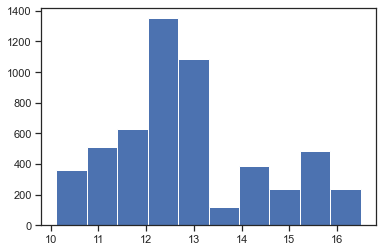

In [16]:
# hist plot of PRICES

plt.hist(transaction_data['PRICE'])

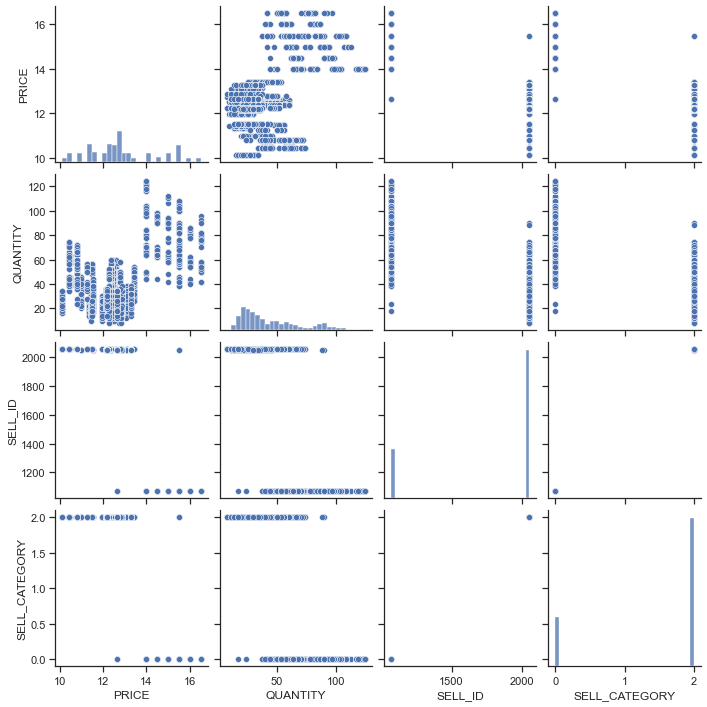

In [17]:
sns.pairplot(transaction_data)

#### About date_info

In [19]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [20]:
date_info.describe()
date_info.describe(include=['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [21]:
# data types
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [22]:
# check for nulls
# a lot of missing values in holiday
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0
5,1/6/12,2012,NaN,0,0,23.0,0
6,1/7/12,2012,NaN,1,0,26.6,0
7,1/8/12,2012,NaN,1,0,26.6,0
8,1/9/12,2012,NaN,0,0,23.0,0
9,1/10/12,2012,NaN,0,0,24.8,0
10,1/11/12,2012,NaN,0,0,21.2,0
11,1/12/12,2012,NaN,0,0,24.8,0
12,1/13/12,2012,NaN,0,0,26.6,0


In [23]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday") 

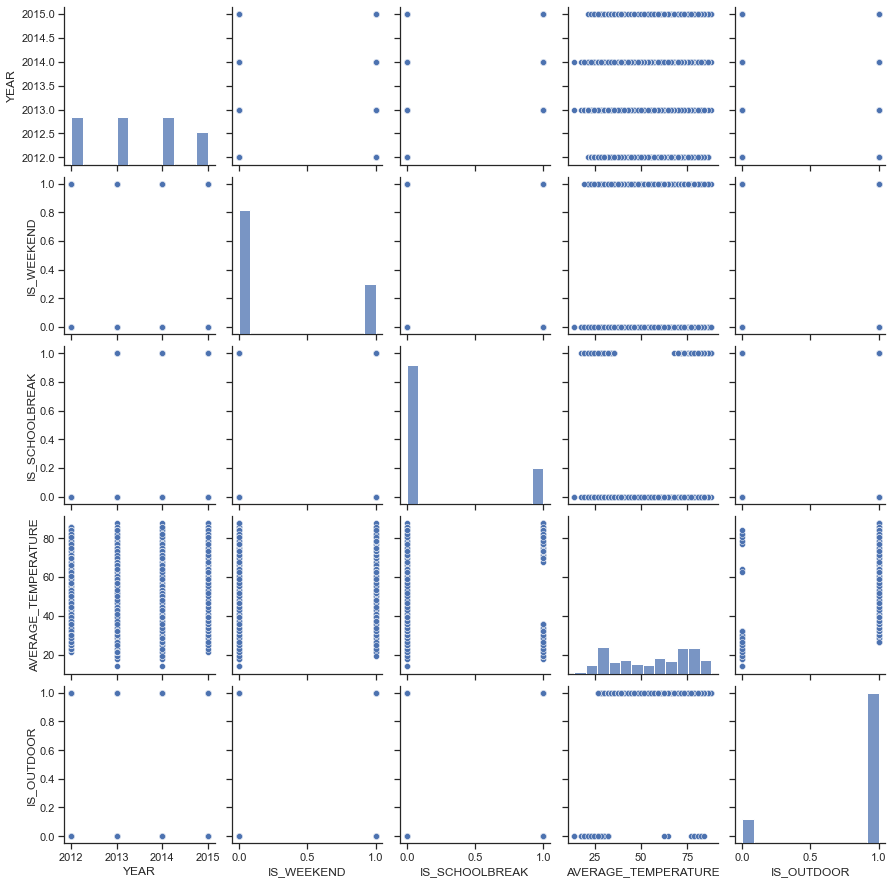

In [24]:
sns.pairplot(date_info)

### Further Exploratory Data Analysis

In [26]:
# Get unique values of the HOLIDAY column  in the date_info data
date_info['HOLIDAY'].unique()

array(['New Year', 'No Holiday', 'Luner New Year', 'Qing Ming Festival',
       'Labor Day', 'Dragon Boat Festivel', 'Mid-Autumn Day',
       'National Day', 'WWII Celebration'], dtype=object)

In [27]:
date_info['HOLIDAY'].value_counts()

No Holiday              1244
Luner New Year            28
National Day              21
Labor Day                 12
Dragon Boat Festivel      12
Qing Ming Festival        12
New Year                  10
Mid-Autumn Day             7
WWII Celebration           3
Name: HOLIDAY, dtype: int64

In [30]:
# Get the oldest date
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [31]:
# Get the earliest date
date_info['CALENDAR_DATE'].max()

'9/9/15'

In [32]:
date_info.shape

(1349, 7)

In [33]:
# check for null values in date_info
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [39]:
# Encoding the ITEM_NAME column in sales_data
pd.get_dummies(sales_data['ITEM_NAME'])

,BURGER,COFFEE,COKE,LEMONADE
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,0,0,1
8,1,0,0,0
9,0,0,1,0


In [40]:
# Concatinating the Encoding with SELL_ID
pd.concat([sales_data['SELL_ID'], pd.get_dummies(sales_data['ITEM_NAME'])], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,1,0,0,0
1,3055,0,1,0,0
2,3067,0,0,1,0
3,3028,0,0,0,1
4,2051,1,0,0,0
5,2051,0,0,1,0
6,2052,1,0,0,0
7,2052,0,0,0,1
8,2053,1,0,0,0
9,2053,0,0,1,0


- Noticed that sell id is not unique, i.e for burger 1070, 2051, 2052 we can consolidate this and make things easier by getting a unique sell id.

In [49]:
pd.concat([sales_data['SELL_ID'], pd.get_dummies(sales_data['ITEM_NAME'])], axis=1).groupby(sales_data['SELL_ID']).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


### Combine Data

In [52]:
# Merge and drop unnecesssary columns
merge_data_1 = pd.merge(sales_data.drop(['ITEM_ID'], axis=1), transaction_data.drop(['SELL_CATEGORY'], axis=1), on= 'SELL_ID')
merge_data_1.head()

# Make merge_data_1 unique on combination of all return features
unique_merge_data_1 = merge_data_1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE'])['QUANTITY'].sum()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104


In [53]:
unique_merge_data_1.head(20)

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.5      46
                                   01/01/13       15.5      60
                                   01/01/14       15.5      72
                                   01/01/15       14.0      66
                                   01/02/12       15.5      70
                                   01/02/13       15.5      68
                                   01/02/14       15.5      76
                                   01/02/15       14.0     102
                                   01/03/12       15.5      62
                                   01/03/13       15.5      70
                                   01/03/14       15.5      68
                                   01/03/15       14.0      68
                                   01/04/12       15.5      88
                                   01/04/13       15.5     100
                                   01/04/14       15.5      74

In [54]:
merge_data_1.shape

(10808, 6)

In [55]:
intermediate_data = unique_merge_data_1.reset_index()

In [56]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [57]:
# Incorporate the date_info data
combined_data = pd.merge(intermediate_data, date_info, on='CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [58]:
# check shape
combined_data.shape


# check for missing values
# no missing values
combined_data[combined_data.isnull().any(axis=1)]

(6696, 12)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [59]:
# check various categories
np.unique(combined_data.HOLIDAY)
np.unique(combined_data.IS_WEEKEND)
np.unique(combined_data.IS_SCHOOLBREAK)

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [60]:
# These attributes are very important in our sales but has nothing to do with price, i.e if Holiday then sales increases, 
# if schoolbreak and weekend then sales will increase. we don't want this effect as we only interested in seeing price effect.
# all effects on sales other than price will be removed from the data set. 
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & 
                         (combined_data['IS_WEEKEND']==0)]
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.50,100,2012,No Holiday,0,0,26.6,0
1,2051,2,BURGER,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
2,2051,2,COKE,1/13/12,12.73,40,2012,No Holiday,0,0,26.6,0
3,2052,2,BURGER,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0
4,2052,2,LEMONADE,1/13/12,12.75,26,2012,No Holiday,0,0,26.6,0


In [61]:
# Check categories
np.unique(bau_data.HOLIDAY)
np.unique(bau_data.IS_WEEKEND)
np.unique(bau_data.IS_SCHOOLBREAK)

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

In [62]:
# check if weekend was removed
bau_data[bau_data['IS_WEEKEND']==1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [ ]:
bau_data[bau_data['HOLIDAY']!='No Holiday']